[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


3187
{'rien': 8729, 'voir': 10534, 'service': 9259, 'matériel': 5948, 'livraison': 5655, 'incompétent': 4967, 'chronopost': 1643, 'aurai': 860, 'livrer': 5666, 'colis': 1737, 'toujours': 10012, 'arriver': 700, 'appeler': 574, 'final': 4137, 'vraiment': 10608, 'lamentable': 5516, 'sinc': 9336, 'rement': 8344, 'allez': 359, 'diriger': 2728, 'autre': 900, 'comme': 1799, 'compétent': 1934, 'sinon': 9340, 'risque': 8745, 'coincé': 1733, 'commande': 1780, 'ferai': 4072, 'site': 9345, 'éviter': 10930, 'absolument': 43, 'acheté': 143, 'drone': 2903, 'avéré': 955, 'défectueux': 3115, 'malgré': 5824, 'retour': 8637, 'délai': 3155, 'légal': 5760, 'rétractation': 9013, 'vendeur': 10372, 'refuse': 8248, 'rembourser': 8332, 'contentant': 2156, 'proposer': 7625, 'remplacement': 8371, 'acheter': 136, 'urgence': 10267, 'voyage': 10596, 'inacceptable': 4910, 'mépris': 6323, 'droits': 2902, 'consommateurs': 2099, 'client': 1700, 'seulement': 9271, 'inefficace': 5038, 'également': 10765, 'dédaigneux': 308

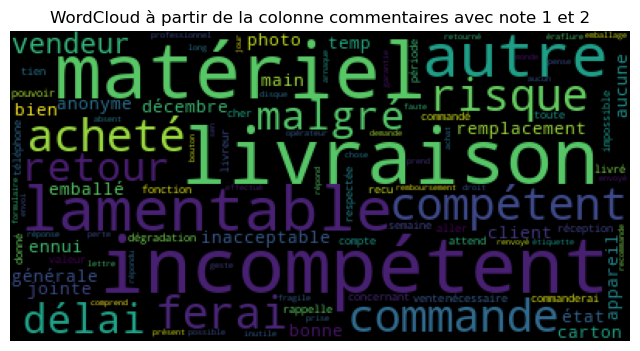

In [5]:
##################################################---WWordCloud et note de satisfaction client ---#################################################################
#
#                                              WordCloud sur les notes de staisfcation client = 1 et 2
#                                              WordCloud sur les notes de satisfaction client= 3
#                                              WordCloud sur les notes de satisfaction client= 4 et 5
#
#################################################################################################################################################################   

# importation 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import nltk

#Téléchargement des ressources NLTK si nécessaire

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import PunktSentenceTokenizer #decoupage en phrase

from nltk.tokenize import word_tokenize #decoupage en mot
from nltk.corpus import stopwords #filtrage stop words
from nltk.tokenize.regexp import RegexpTokenizer #pour détacher "laissez-vous"
from nltk.tokenize import word_tokenize



from sklearn.feature_extraction.text import CountVectorizer  ###CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer ## score TF-IDF 
from nltk.stem.snowball import FrenchStemmer #Normalisation lexicale-La racinisation
from nltk.stem import WordNetLemmatizer # lemmatisation
from wordcloud import WordCloud #nuage de mot

###############################################################################################################################################################################
# _____________________________________________________Traitement des variables texte : commentaires _______________________________________________________________________
#                                                      # Nuage de mots + note de statisfaction client = 1 et 2
################################################################################################################################################################################

#__________________________________________________________Mise en forme de 2 colonnes__________________________________________________________________________________________
df = pd.read_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\df_projet_truspilot2_etape2.csv", sep=',')

#Note de staisfaction client = 1 et 2
df= df[(df['Note client'] < 3)]

df.rename(columns={'Note client': 'Note_client'}, inplace=True)
df.rename(columns={"Nombre d'avis du client": 'Nombre_avis_client'}, inplace=True)
df.rename(columns={'Titre commentaire': 'Titre_commentaire'}, inplace=True)
df.rename(columns={'Date de publication': 'Date_de _publication'}, inplace=True)
print(len(df))
# Remplace les valeurs manquantes de la colonne Commentaire par le contenu de la colonne titre
df['Commentaire'] = df['Commentaire'].fillna(df['Titre_commentaire'])

# 1-Mettre en minuscules
df["Commentaire"] = df["Commentaire"].str.lower()
df["Titre_commentaire"] = df["Titre_commentaire"].str.lower()

# 2 Supprime les chiffres
df["Commentaire"] = df["Commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))
df["Titre_commentaire"] = df["Titre_commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))

# Applique la tokenisation découpage d'un paragraphe en phrase
tokenizer = PunktSentenceTokenizer()
df['phrases'] = df['Commentaire'].apply(lambda x: tokenizer.tokenize(x))

# Applique la tokenization découper d'une phrase en mots avec word_tokenize
df['mots'] = df['Commentaire'].apply(lambda x: word_tokenize(x, language='french'))
df['mots_titre'] = df['Titre_commentaire'].apply(lambda x: word_tokenize(x, language='french'))

# Filtrage Stop Words
stop_words = set(stopwords.words('french'))
stop_words.update([",", ".", "cela", "fait", "dire", "bonjour", "faire", "avoir", "peut", "donc", "mais","avec","avant","alors","tout","bref","plus","cette"])

def stop_words_filtering(mots): 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

# Applique la fonction de la colonne 'mots' (issue de commentaire)
mots_filtres = stop_words_filtering(df['mots'].sum())
mots_filtres_titre = stop_words_filtering(df['mots_titre'].sum())

# Conserve les mots avec plus de 4 caractères
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")
tokens = tokenizer.tokenize(' '.join(mots_filtres))  
tokens_titre = tokenizer.tokenize(' '.join(mots_filtres_titre)) 

# Lemmatisation
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatisation(mots):
    sortie = []
    for mot in mots:
        lemme_verbe = wordnet_lemmatizer.lemmatize(mot, pos='v')
        lemme_nom = wordnet_lemmatizer.lemmatize(mot, pos='n')
        
        if lemme_verbe not in sortie:
            sortie.append(lemme_verbe)
        if lemme_nom not in sortie:
            sortie.append(lemme_nom)
    return sortie

tokenslemma = lemmatisation(tokens)
tokenslemma_titre = lemmatisation(tokens_titre)


# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
vectorized_tfidf = vectorizer_tfidf.fit_transform([' '.join(tokenslemma)])
tokenized_tfidf = vectorizer_tfidf.vocabulary_

print(tokenized_tfidf)

#################################################################-NUAGE DE MOTS-###########################################################################

# Génére et affiche le nuage de mots de commentaire avec les notes 1 et 2

#transforme en liste
var=' '.join(tokenslemma)
wc=WordCloud(background_color="black",max_words=100,stopwords=stop_words,max_font_size=50, random_state=42)

# Génére et afficher le nuage de mots
plt.figure(figsize= (8,6)) 
wc.generate(var)          # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.axis('off')
plt.title("WordCloud à partir de la colonne commentaires avec note 1 et 2" )
plt.show()




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


1302
{'satisfaite': 4767, 'livraison': 2941, 'attend': 380, 'attends': 390, 'toute': 5271, 'journée': 2810, 'colis': 925, 'déposé': 1766, 'point': 3819, 'relais': 4374, 'sans': 4754, 'prévenir': 4119, 'venu': 5472, 'domicile': 1555, 'jamais': 2786, 'demandé': 1394, 'code': 917, 'juste': 2831, 'problem': 3962, 'niveau': 3351, 'comande': 940, 'selectioner': 4809, 'option': 3481, 'payment': 3669, 'etait': 2007, 'debiter': 1366, 'some': 4938, 'foix': 2249, 'préparation': 4100, 'expédition': 2082, 'livreur': 2956, 'chronopost': 870, 'mauvais': 3125, 'livré': 2960, 'ensemble': 1920, 'bien': 563, 'passé': 3642, 'seul': 4849, 'probl': 3961, 'obligé': 3429, 'aller': 168, 'chercher': 840, 'chez': 845, 'devait': 1447, 'etre': 2012, 'matériel': 3123, 'arrivé': 349, 'bbonne': 540, 'condition': 1063, 'notice': 3377, 'montage': 3241, 'carte': 740, 'graphique': 2419, 'installé': 2701, 'service': 4846, 'qualité': 4165, 'reste': 4517, 'revoir': 4580, 'certains': 789, 'titres': 5231, 'titre': 5230, 'arti

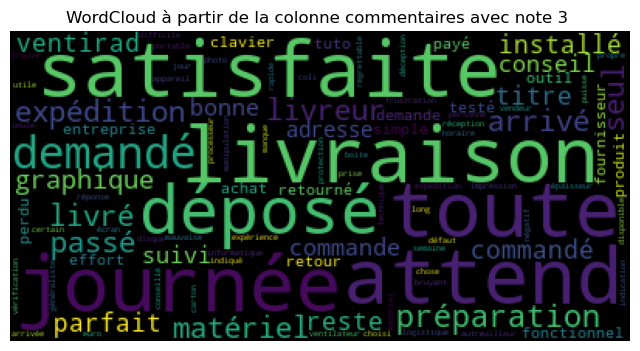

In [9]:
###############################################################################################################################################################################
# __________________________________________ Traitement des variables texte : titre de commentaire et commentaires__________________________________________________________ 
#                                                                # Nuage de mots + note satisfaction = 3
################################################################################################################################################################################
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import nltk

#Téléchargement des ressources NLTK si nécessaire

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import PunktSentenceTokenizer #decoupage en phrase

from nltk.tokenize import word_tokenize #decoupage en mot
from nltk.corpus import stopwords #filtrage stop words
from nltk.tokenize.regexp import RegexpTokenizer #pour détacher "laissez-vous"
from nltk.tokenize import word_tokenize



from sklearn.feature_extraction.text import CountVectorizer  ###CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer ## score TF-IDF 
from nltk.stem.snowball import FrenchStemmer #Normalisation lexicale-La racinisation
from nltk.stem import WordNetLemmatizer # lemmatisation
from wordcloud import WordCloud #nuage de mot
#__________________________________________________________Mise en forme de 2 colonnes__________________________________________________________________________________________

df = pd.read_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\df_projet_truspilot2_etape2.csv", sep=',')

##Note de satisfaction client = 3
df= df[(df['Note client'] == 3)]

df.rename(columns={'Note client': 'Note_client'}, inplace=True)
df.rename(columns={"Nombre d'avis du client": 'Nombre_avis_client'}, inplace=True)
df.rename(columns={'Titre commentaire': 'Titre_commentaire'}, inplace=True)
df.rename(columns={'Date de publication': 'Date_de _publication'}, inplace=True)
print(len(df))

# Remplace les valeurs manquantes de la colonne Commentaire par le contenu de la colonne titre
df['Commentaire'] = df['Commentaire'].fillna(df['Titre_commentaire'])

# 1-Mettre en minuscules
df["Commentaire"] = df["Commentaire"].str.lower()
df["Titre_commentaire"] = df["Titre_commentaire"].str.lower()

# 2 Supprime les chiffres
df["Commentaire"] = df["Commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))
df["Titre_commentaire"] = df["Titre_commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))

# Applique la tokenisation découpage d'un paragraphe en phrase
tokenizer = PunktSentenceTokenizer()
df['phrases'] = df['Commentaire'].apply(lambda x: tokenizer.tokenize(x))

# Applique la tokenization découper d'une phrase en mots avec word_tokenize
df['mots'] = df['Commentaire'].apply(lambda x: word_tokenize(x, language='french'))
df['mots_titre'] = df['Titre_commentaire'].apply(lambda x: word_tokenize(x, language='french'))

# Filtrage Stop Words
stop_words = set(stopwords.words('french'))
stop_words.update([",", ".", "cela", "fait", "dire", "bonjour", "faire", "avoir", "peut", "donc", "mais","avec","avant","alors","tout","bref","plus","cette"])

def stop_words_filtering(mots): 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

# Applique la fonction de la colonne 'mots' (issue de commentaire)
mots_filtres = stop_words_filtering(df['mots'].sum())
mots_filtres_titre = stop_words_filtering(df['mots_titre'].sum())

# Conserve les mots avec plus de 4 caractères
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")
tokens = tokenizer.tokenize(' '.join(mots_filtres))  
tokens_titre = tokenizer.tokenize(' '.join(mots_filtres_titre)) 

# Lemmatisation
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatisation(mots):
    sortie = []
    for mot in mots:
        lemme_verbe = wordnet_lemmatizer.lemmatize(mot, pos='v')
        lemme_nom = wordnet_lemmatizer.lemmatize(mot, pos='n')
        
        if lemme_verbe not in sortie:
            sortie.append(lemme_verbe)
        if lemme_nom not in sortie:
            sortie.append(lemme_nom)
    return sortie

tokenslemma = lemmatisation(tokens)
tokenslemma_titre = lemmatisation(tokens_titre)


# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
vectorized_tfidf = vectorizer_tfidf.fit_transform([' '.join(tokenslemma)])
tokenized_tfidf = vectorizer_tfidf.vocabulary_

print(tokenized_tfidf)

###################################################-NUAGE DE MOTS-###########################################################################

# Génére et affiche le nuage de mots de commentaire avec la note 3

#transforme en liste
var=' '.join(tokenslemma)
wc=WordCloud(background_color="black",max_words=100,stopwords=stop_words,max_font_size=50, random_state=42)

# Génére et affiche le nuage de mots
plt.figure(figsize= (8,6)) 
wc.generate(var)          # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.axis('off')
plt.title("WordCloud à partir de la colonne commentaires avec note 3 ")
plt.show()



29074
{'acheté': 184, 'premi': 10429, 'configurztion': 2947, 'chez': 2265, 'materiel': 8304, 'conseils': 3104, 'époque': 15402, 'permis': 9978, 'garder': 6259, 'configuration': 2943, 'jusqu': 7574, 'maintenant': 8103, 'aujourd': 1176, 'suite': 13632, 'arret': 933, 'prochain': 10565, 'support': 13684, 'windows': 15163, 'window': 15162, 'appel': 786, 'technique': 13989, 'réponses': 12635, 'rapides': 11363, 'claires': 2382, 'durant': 4295, 'années': 691, 'réguli': 12582, 'rement': 11874, 'sans': 12780, 'faille': 5699, 'partais': 9737, 'recherche': 11543, 'premier': 10430, 'ecran': 4809, 'gamer': 6228, 'sachant': 12730, 'tellement': 14018, 'commencer': 2640, 'trouvé': 14501, 'site': 13158, 'plein': 10171, 'utiles': 14667, 'prendre': 10444, 'décision': 4406, 'proposant': 10745, 'prix': 10520, 'attractifs': 1141, 'lors': 7986, 'prochaine': 10566, 'commande': 2568, 'matériel': 8344, 'commencerai': 2641, 'récemment': 12476, 'probl': 10550, 'carte': 2021, 'graphique': 6411, 'remplacée': 11910, 

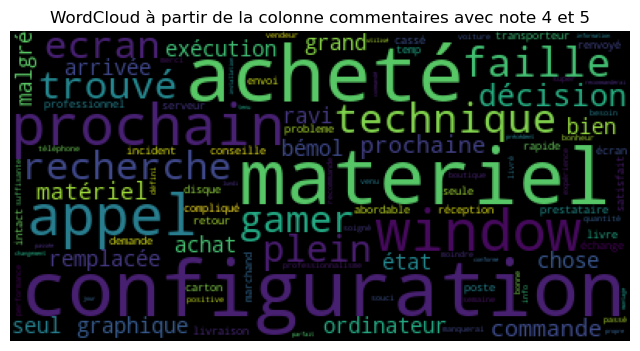

In [8]:
###############################################################################################################################################################################
# _______________________________________________________ Traitement des variables texte :  commentaires ______________________________________________________________________
#                                                        # Nuage de mots + note de satisfaction = 4 et 5
################################################################################################################################################################################

#__________________________________________________________Mise en forme de 2 colonnes__________________________________________________________________________________________

df = pd.read_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\df_projet_truspilot2_etape2.csv", sep=',')

##Note de satisfaction client = 4 et 5
df= df[(df['Note client'] > 3)]

df.rename(columns={'Note client': 'Note_client'}, inplace=True)
df.rename(columns={"Nombre d'avis du client": 'Nombre_avis_client'}, inplace=True)
df.rename(columns={'Titre commentaire': 'Titre_commentaire'}, inplace=True)
df.rename(columns={'Date de publication': 'Date_de _publication'}, inplace=True)
print(len(df))

# Remplace les valeurs manquantes de la colonne Commentaire par le contenu de la colonne titre
df['Commentaire'] = df['Commentaire'].fillna(df['Titre_commentaire'])

# 1-Mettre en minuscules
df["Commentaire"] = df["Commentaire"].str.lower()
df["Titre_commentaire"] = df["Titre_commentaire"].str.lower()

# 2 Supprime les chiffres
df["Commentaire"] = df["Commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))
df["Titre_commentaire"] = df["Titre_commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))

# Applique la tokenisation découpage d'un paragraphe en phrase
tokenizer = PunktSentenceTokenizer()
df['phrases'] = df['Commentaire'].apply(lambda x: tokenizer.tokenize(x))

# Applique la tokenization découper d'une phrase en mots avec word_tokenize
df['mots'] = df['Commentaire'].apply(lambda x: word_tokenize(x, language='french'))
df['mots_titre'] = df['Titre_commentaire'].apply(lambda x: word_tokenize(x, language='french'))

# Filtrage Stop Words
stop_words = set(stopwords.words('french'))
stop_words.update([",", ".", "cela", "fait", "dire", "bonjour", "faire", "avoir", "peut", "donc", "mais","avec","avant","alors","tout","bref","plus","cette"])

def stop_words_filtering(mots): 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

# Applique la fonction de la colonne 'mots' (issue de commentaire)
mots_filtres = stop_words_filtering(df['mots'].sum())
mots_filtres_titre = stop_words_filtering(df['mots_titre'].sum())

# Conserve les mots avec plus de 4 caractères
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")
tokens = tokenizer.tokenize(' '.join(mots_filtres))  
tokens_titre = tokenizer.tokenize(' '.join(mots_filtres_titre)) 

# Lemmatisation
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatisation(mots):
    sortie = []
    for mot in mots:
        lemme_verbe = wordnet_lemmatizer.lemmatize(mot, pos='v')
        lemme_nom = wordnet_lemmatizer.lemmatize(mot, pos='n')
        
        if lemme_verbe not in sortie:
            sortie.append(lemme_verbe)
        if lemme_nom not in sortie:
            sortie.append(lemme_nom)
    return sortie

tokenslemma = lemmatisation(tokens)
tokenslemma_titre = lemmatisation(tokens_titre)


# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
vectorized_tfidf = vectorizer_tfidf.fit_transform([' '.join(tokenslemma)])
tokenized_tfidf = vectorizer_tfidf.vocabulary_

print(tokenized_tfidf)

#################################################################-NUAGE DE MOTS-###########################################################################

# Génére et affiche le nuage de mots de commentaire avec les notes 4 et 5

#transforme en liste
var=' '.join(tokenslemma)
wc=WordCloud(background_color="black",max_words=100,stopwords=stop_words,max_font_size=50, random_state=42)

# Génére et affiche le nuage de mots
plt.figure(figsize= (8,6)) 
wc.generate(var)          # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.axis('off')
plt.title("WordCloud à partir de la colonne commentaires avec note 4 et 5" )
plt.show()

